<a href="https://colab.research.google.com/github/Alf-caput/LAB04_Regresion_y_agrupamiento/blob/Adev/LAB04%20Regresion_y_agrupamientov2_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB04: Regresion y agrupamientov2
##### Grupo: B05

Si estamos utilizando google colab, en vez de clonar el repositorio, con wget obtenemos el archivo que contiene el dataset

In [34]:
import os

filename = 'wine_alcohol.csv'
url = 'https://github.com/Alf-caput/LAB04_Regresion_y_agrupamiento/raw/main/wine_alcohol.csv'

if not os.path.exists(filename):
    os.system('wget' + ' ' + url)

Junto con las librerías requeridas

In [35]:
import os

requirements = 'requirements.txt'
url = 'https://github.com/Alf-caput/LAB04_Regresion_y_agrupamiento/raw/main/requirements.txt'

if not os.path.exists(requirements):
    os.system('wget' + ' ' + url)

os.system('pip install -r requirements.txt')

0

Leemos el archivo csv

In [36]:
import pandas as pd

filename = 'wine_alcohol.csv'
df = pd.read_csv(filename, sep=';')

df.head()

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,wine type,alcohol
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,1,9.4
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,5,1,9.8
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,5,1,9.8
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,6,1,9.8
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,1,9.4


Nos fijamos que los valores de la columna index se corresponden con el índice de fila que nos genera pandas.   

In [37]:
len(df.index.unique()) == len(df['id'])

True

Por tanto, podemos usar esa columna como índice

In [38]:
df = df.set_index('id')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,wine type,alcohol
id,,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,1,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,5,1,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,5,1,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,6,1,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,1,9.4


Con el método info podemos ver los tipos de las variables:

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  quality               6497 non-null   int64  
 11  wine type             6497 non-null   int64  
 12  alcohol               6497 non-null   float64
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


Todas parecen ser de tipo numérico, no obstante como veremos más adelante las variables **quality** y **wine type** toman valores numéricos discretos que realmente hacen referencia a categorías.

Podemos también comprobar la existencia de valores NA en el dataset:

In [40]:
print(f'Número total de NA en el dataframe: {(col_na:=df.isna().sum()).sum()}')
pd.DataFrame({'Valores NA': col_na})

Número total de NA en el dataframe: 0


,Valores NA
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


No se encuentra ninguno, en caso contrario habría sido necesario tomar una decisión sobre eliminar esas observaciones o sustituir el valor NA por algún valor que sea coherente con los datos como por ejemplo la media.

Con el método describe podemos hacernos una idea de los rangos en los que se mueven las variables:

In [41]:
# Only check partial info and use .T for clearer appearance
significant_info = ['mean', 'std', 'min', 'max']
df.describe().T.loc[:, significant_info]

,mean,std,min,max
fixed acidity,7.215307,1.296434,3.80000,15.90000
volatile acidity,0.339666,0.164636,0.08000,1.58000
citric acid,0.318633,0.145318,0.00000,1.66000
residual sugar,5.443235,4.757804,0.60000,65.80000
chlorides,0.056034,0.035034,0.00900,0.61100
free sulfur dioxide,30.525319,17.749400,1.00000,289.00000
total sulfur dioxide,115.744574,56.521855,6.00000,440.00000
density,0.994697,0.002999,0.98711,1.03898
pH,3.218501,0.160787,2.72000,4.01000
sulphates,0.531268,0.148806,0.22000,2.00000


Finalmente con boxplots podemos comprobar a simple vista que existen outliers en distintas variables, más adelante tomamos decisiones sobre los mismos

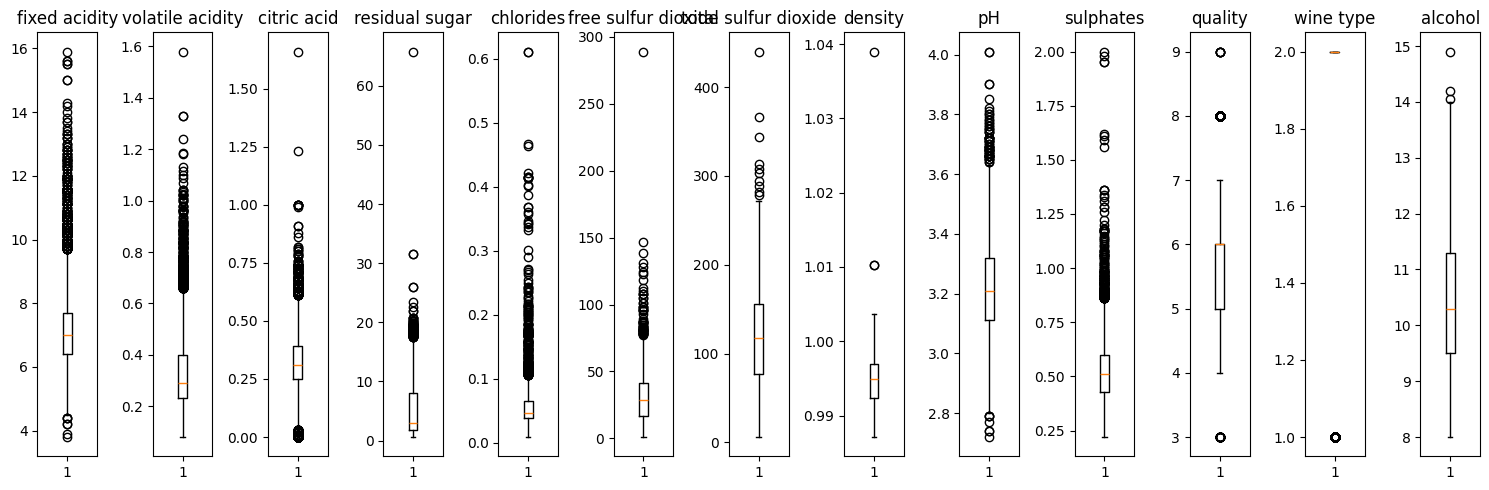

In [42]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(15, 5))

for i, columna in enumerate(df.columns):
    axs[i].boxplot(df[columna])
    axs[i].set_title(columna)

plt.tight_layout()

plt.show()

El dataset cuenta con las siguientes variables:  

- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- quality
- winetype
- alcohol

Sería de interés eliminar o sustituir (por otros coherentes) valores que no tengan sentido.

Como no somos expertos en el campo, vamos a estudiar un subconjunto de las variables para la limpieza del dataset, y posteriormente decidiremos la forma de eliminar outliers sobre el conjunto completo de variables.

Subconjunto sobre el que se hace limpieza:
- citric acid
- pH
- quality
- winetype
- alcohol

Aunque **fixed acidity** y **volatile acidity** son valores importantes no somos expertos y se definen a partir de la combinación de ácidos de distintos tipos, los excluimos del analisis inicial en limpieza y solo nos fijamos en **citric acid**.  

La variable **citric acid** nos indica la acidez que aporta el ácido cítrico, el cual es un ácido no volátil (en inglés non volatiles o **fixed acids**) que deberá estar correlacionado con los valores de la variable **fixed acid**.

##### Variable: **citric acid**

Investigando un poco podemos suponer que la variable **citric acid** se expresa concentración, la cual se suele expresar en g/L, algo lógico al estar la media en 0.3 que tiene sentido estando el rango habitual(*) entre 0 y 1 g/L.

(*Fuente: https://www.vinosycavasonline.es/los-aacidos-del-vino.-quae-son-y-caomo-se-forman.#:~:text=El%20%C3%A1cido%20c%C3%ADtrico%20est%C3%A1%20presente,1%2D1%20g%2Fl.)

In [43]:
df.describe().drop('count').T.loc[['citric acid'], :]

,mean,std,min,25%,50%,75%,max
citric acid,0.318633,0.145318,0.0,0.25,0.31,0.39,1.66


No obstante, el máximo supera 1g/L lo cual no es posible al ser este el actual límite
jurídico europeo(*).  

(*Fuente: https://www.vason.com/uploads/MediaGalleryArticoliDocumenti/%C3%81cido%20C%C3%ADtrico%202_es.pdf)

In [44]:
c_acid_ilegal = df.loc[:, 'citric acid'] > 1
print('Número de vinos ilegales:', c_acid_ilegal.sum())
df[c_acid_ilegal].head()

Número de vinos ilegales: 2


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,wine type,alcohol
id,,,,,,,,,,,,,
745,7.4,0.20,1.66,2.1,0.022,34.0,113.0,0.99165,3.26,0.55,6,2,12.2
3152,7.6,0.25,1.23,4.6,0.035,51.0,294.0,0.99018,3.03,0.43,6,2,13.1


Se eliminan:

In [45]:
df = df[~c_acid_ilegal]
len(df)

6495

##### Variable: **pH**

En cuanto a la variable **pH** los valores normales oscilan entre 3 y 4 (*), mientras que nuestros valores mínimo y máximo son 2.72 y 4.01.

El valor máximo no se aleja del rango pero si que ocurre con el mínimo.

(*Fuente: https://www.hannainst.es/blog/1513/pH-en-la-elaboracion-del-vino#:~:text=La%20mayor%C3%ADa%20de%20los%20vinos,m%C3%A1s%20comunes%20para%20los%20tintos.)

No obstante, no tomaremos medidas sobre eliminar o modificar los valores por debajo del rango habitual, porque la diferencia no es excesiva y tal vez que un pH cambie en 0.3 unidades de los valores mínimos no sea algo extraño para algunos vinos. 

Vemos que existen outliers y más adelante decidiremos que hacer con ellos.

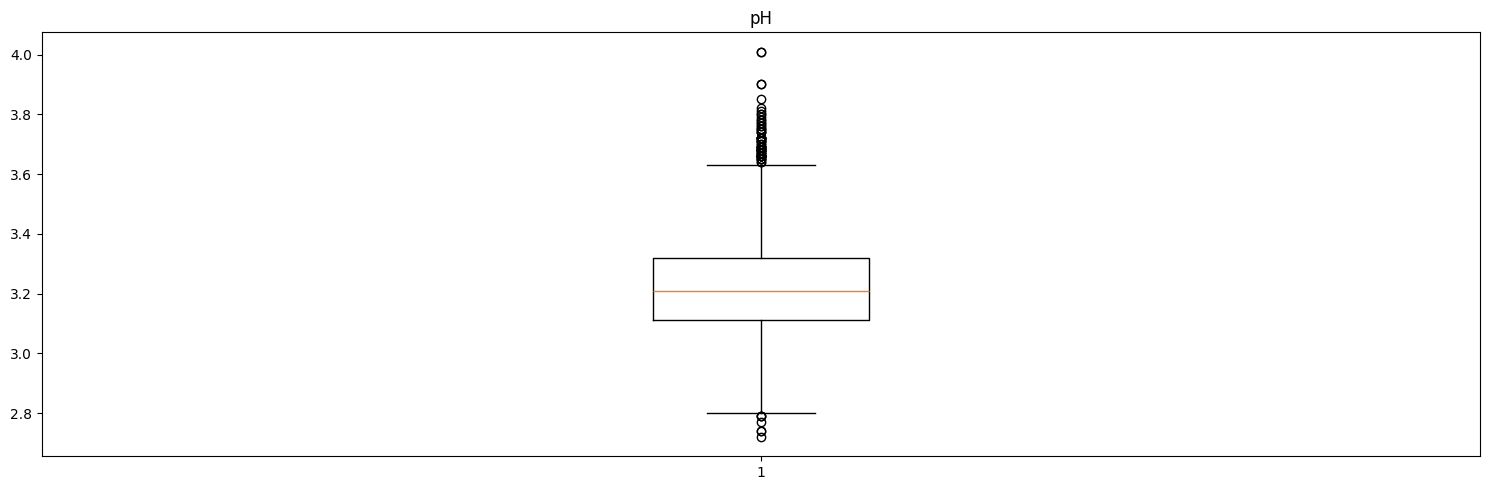

In [46]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

axs.boxplot(df['pH'])
axs.set_title('pH')

plt.tight_layout()

plt.show()

##### Variable: **quality**

Existen 7 tipos de calidades registradas:

In [47]:
possible_qualities = df['quality'].unique()
possible_qualities

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

Podemos ver su distribución mediante un diagram de barras:

<BarContainer object of 7 artists>

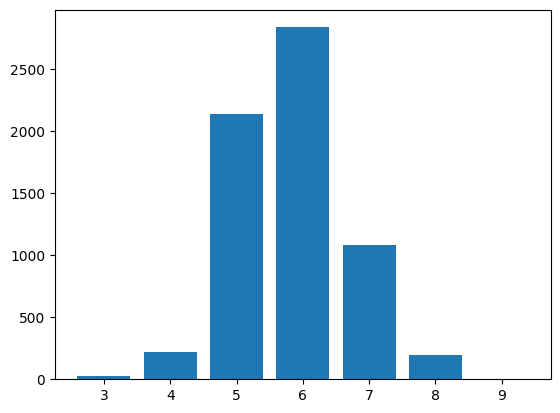

In [48]:
quality_freq = df['quality'].value_counts()
plt.bar(quality_freq.index, quality_freq.values)

Se trata de una variable numérica discreta que podemos tratar como categórica, además en el diagrama de barras vemos que las clases no están igualmente de representadas, siendo la más frecuente los vinos con calidad 6. Una acción que podemos tomar es agrupar en 3 categorías:

- malo: 3-5
- normal: 6
- bueno: 7-9

Esta agrupación nos permite reducir la dimensionalidad del espacio de valores posibles y conseguir categorías con frecuencias más próximas

Por sencillez vamos a agrupar en 0 los valores menores que calidad 5, en 0.5 los de calidad 6 y en 1 los mayores que 7, esto será útil cuando hagamos transformaciones de escalado de datos:

C:\Users\alfre\AppData\Local\Temp\ipykernel_19496\3704146505.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[normal, var] = 0.5


<BarContainer object of 3 artists>

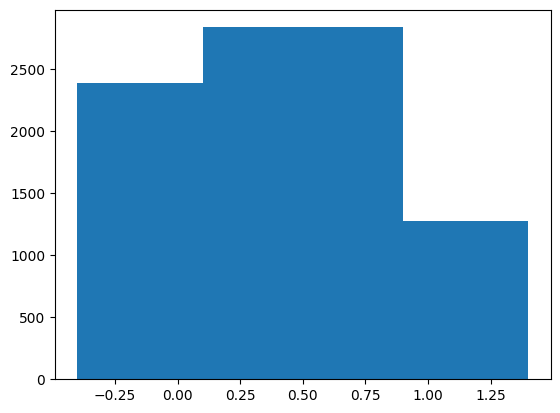

In [49]:
var = 'quality'

bad = df.loc[:, var] < 6
normal = df.loc[:, var] == 6
good = df.loc[:, var] > 6

df.loc[bad, var] = 0
df.loc[normal, var] = 0.5
df.loc[good, var] = 1

quality_freq = df['quality'].value_counts()
plt.bar(quality_freq.index, quality_freq.values)

Comprobamos que ha tenido éxito la transformación

In [50]:
df.loc[:, ['quality']].head()

,quality
id,
0,0.0
1,0.0
2,0.0
3,0.5
4,0.0


##### Variable: **winetype**

La variable **wine type** no sabemos como se ha estimado, pero es sencilla, solo toma dos valores:

In [51]:
df['wine type'].unique()

array([1, 2], dtype=int64)

Se trata de un tipo de vino, esto es, una variable categórica binaria.

Existen más vinos que pertenecen al tipo 2 que al tipo 1:

In [52]:
winetype_freq = df['wine type'].value_counts()
winetype_freq

wine type
2    4896
1    1599
Name: count, dtype: int64

Con un diagrama de barras se observa mejor:

<BarContainer object of 2 artists>

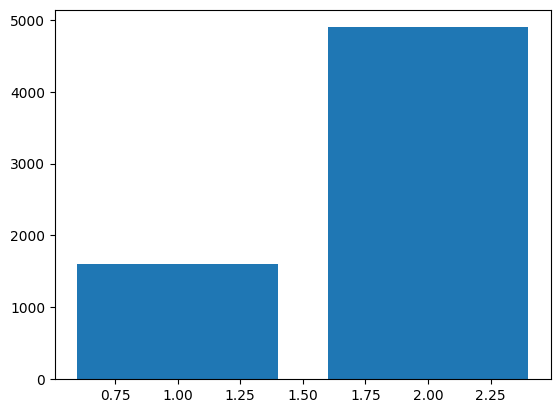

In [53]:
plt.bar(winetype_freq.index, winetype_freq.values)

Vamos a pasar a un rango onehot los tipos de vino de forma que el vino tipo 1 tomará valor numérico 0 y el tipo 2 valor numérico 1

In [54]:
df['wine type'] = df['wine type'].map({1: 0, 2: 1})
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,wine type,alcohol
id,,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,0.0,0,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,0.0,0,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,0.0,0,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,0.5,0,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,0.0,0,9.4


##### Variable: **alcohol**

El alcohol en el vino se expresa en tanto por ciento y ronda entre 5.5% y 25%. Lo cual es coherente con los valores del dataset (suponemos que utilizan esta métrica).

In [55]:
df.describe().drop('count').T.loc[['alcohol'], :]

,mean,std,min,25%,50%,75%,max
alcohol,10.491136,1.192268,8.0,9.5,10.3,11.3,14.9


Con un boxplot nos hacemos idea de la cantidad de outliers y como se distribuyen los valores de la variable:

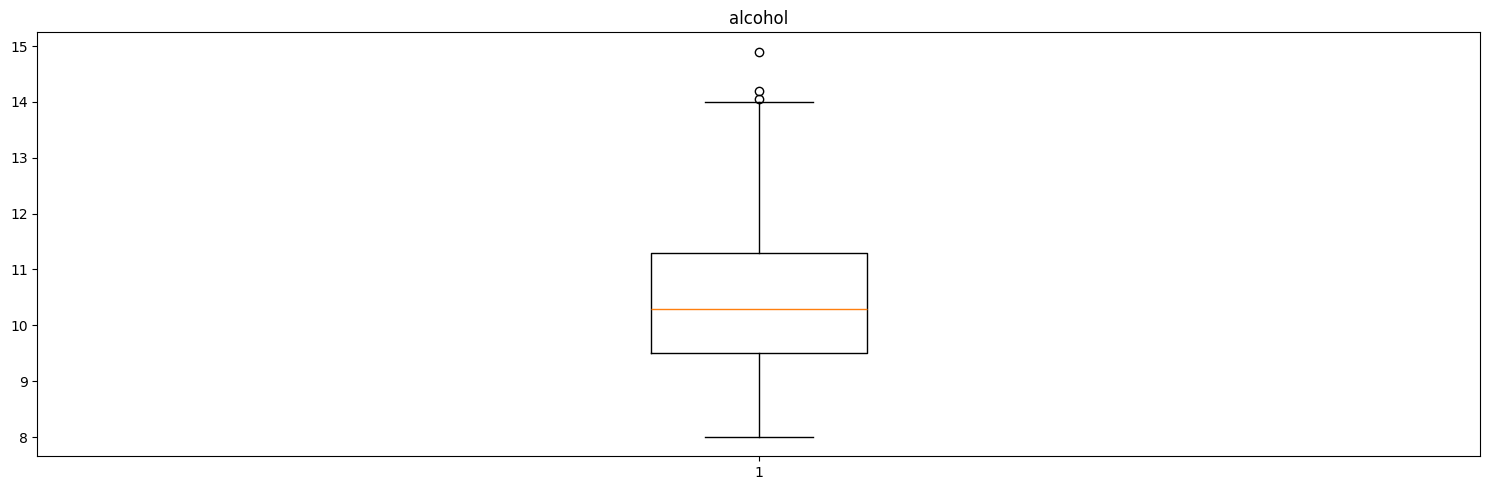

In [56]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

axs.boxplot(df['alcohol'])
axs.set_title('alcohol')

plt.tight_layout()

plt.show()

Creamos variables dummies

### Outliers

Finalmente una vez se han estudiado este subconjunto de variables, se realiza una eliminación de outliers utilizando el rango intercuartílico (IQR).

Se define una función para obtener un pandas dataframe con los límites a partir de los que categorizamos como outlier utilizando IQR:

In [57]:
import pandas as pd

def get_outlier_bounds(df:pd.DataFrame, selected_cols:list):
    selected_df = df[selected_cols]

    # Calcular el cuartil 1 (Q1) y el cuartil 3 (Q3)
    Q1 = selected_df.quantile(0.25)
    Q3 = selected_df.quantile(0.75)

    IQR = Q3 - Q1
    outliers_range = 1.5 * IQR

    lower_bound = Q1 - outliers_range
    upper_bound = Q3 + outliers_range

    outlier_bounds = pd.DataFrame({'lower_bound': lower_bound, 'upper_bound': upper_bound})

    return outlier_bounds


get_outlier_bounds(df, ['pH']).head()

,lower_bound,upper_bound
pH,2.795,3.635


Las variables **wine type** y **quality** hemos definido como valores numéricos aunque representan categorías, ya hemos visto sus frecuencias y decidimos no discriminar más aunque las frecuencias (ya reducidas en el caso de **quality**) sean diferentes entre categorías.

In [58]:
categorical_vars = ['wine type', 'quality']
df_non_categorical = df.drop(categorical_vars, axis=1)
df_bounds = get_outlier_bounds(df_non_categorical, df_non_categorical.columns)
df_bounds

,lower_bound,upper_bound
fixed acidity,4.450000,9.650000
volatile acidity,-0.025000,0.655000
citric acid,0.040000,0.600000
residual sugar,-7.650000,17.550000
chlorides,-0.002500,0.105500
free sulfur dioxide,-19.000000,77.000000
total sulfur dioxide,-41.500000,274.500000
density,0.985365,1.003965
pH,2.795000,3.635000
sulphates,0.175000,0.855000


Podemos ver la cantidad de outliers en cada categoría

In [59]:
outliers_count = {}

for columna in df_bounds.index:
    lower_bound = df_bounds.loc[columna, 'lower_bound']
    upper_bound = df_bounds.loc[columna, 'upper_bound']
    outliers_count[columna] = ((df[columna] < lower_bound) | (df[columna] > upper_bound)).sum()

outliers_count

{'fixed acidity': 357,
 'volatile acidity': 377,
 'citric acid': 507,
 'residual sugar': 118,
 'chlorides': 286,
 'free sulfur dioxide': 62,
 'total sulfur dioxide': 9,
 'density': 3,
 'pH': 73,
 'sulphates': 191,
 'alcohol': 3}

Tras este análisis parcial estudiamos el conjunto total

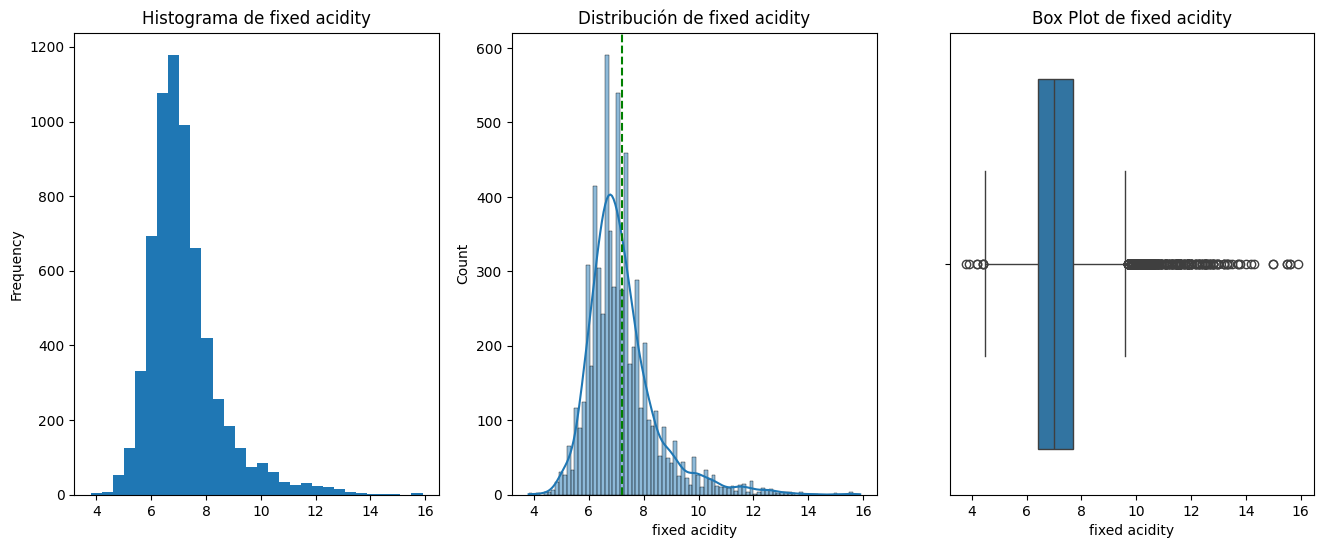

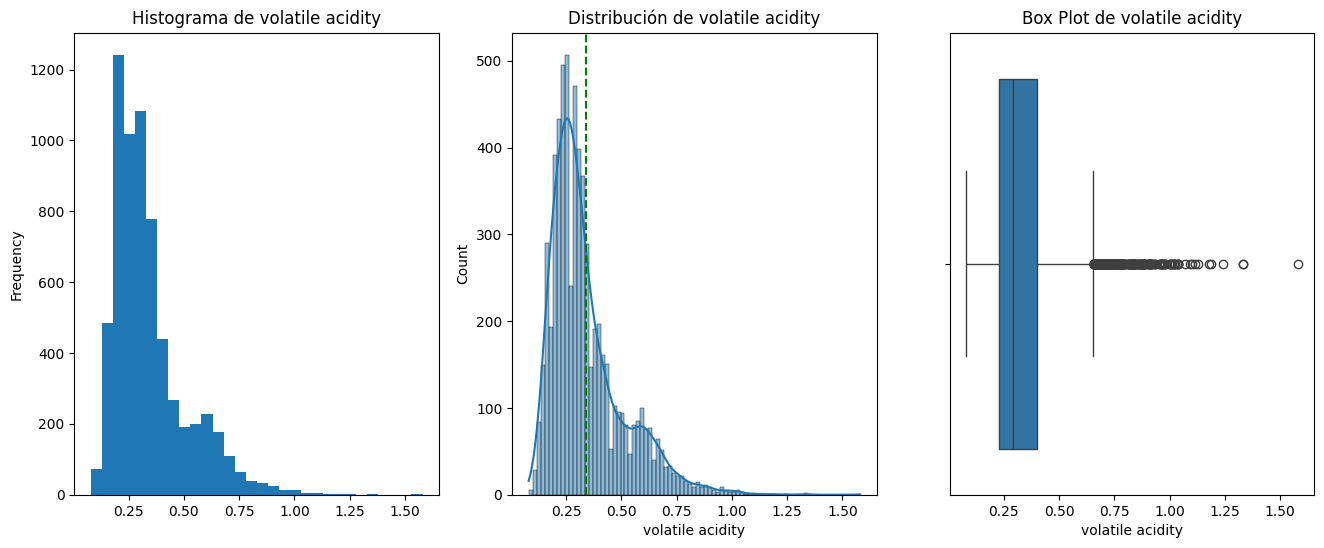

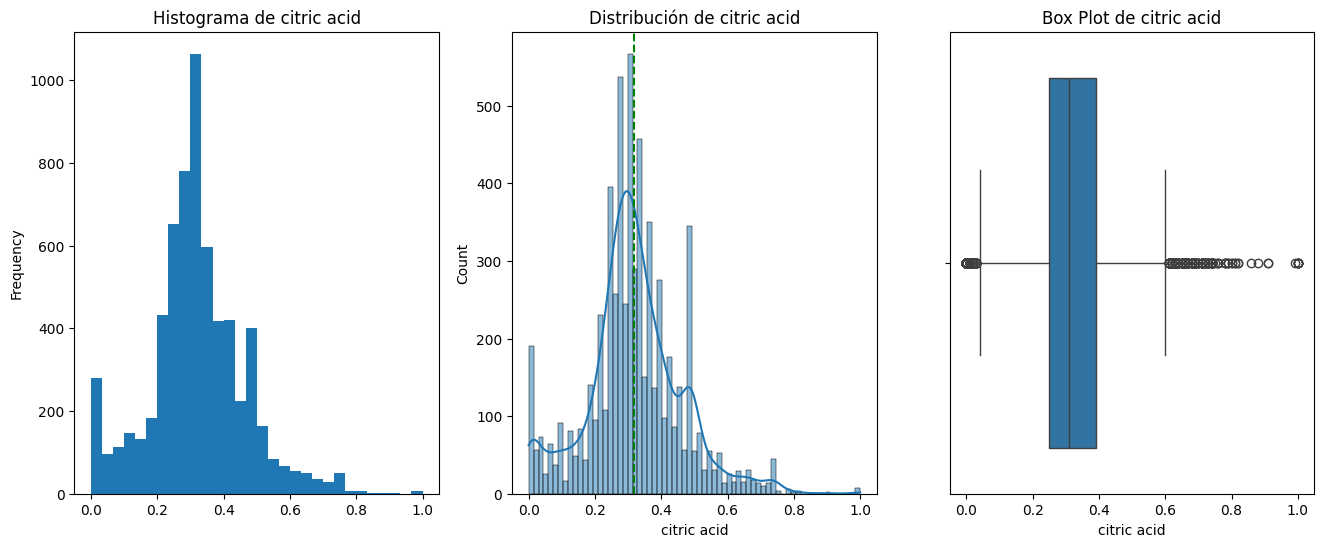

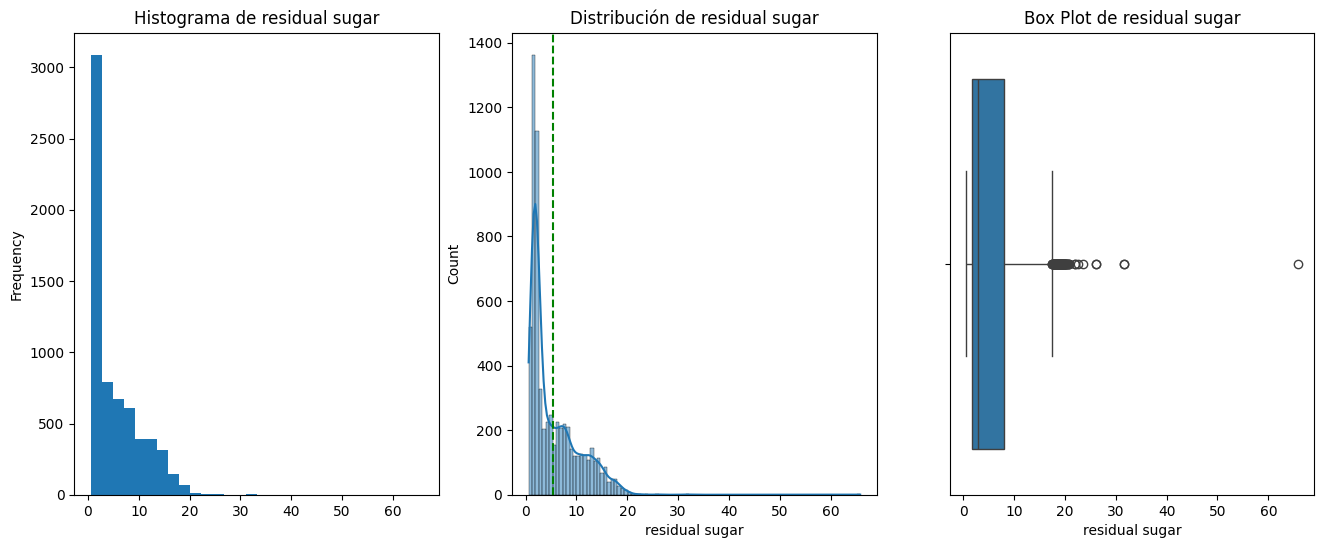

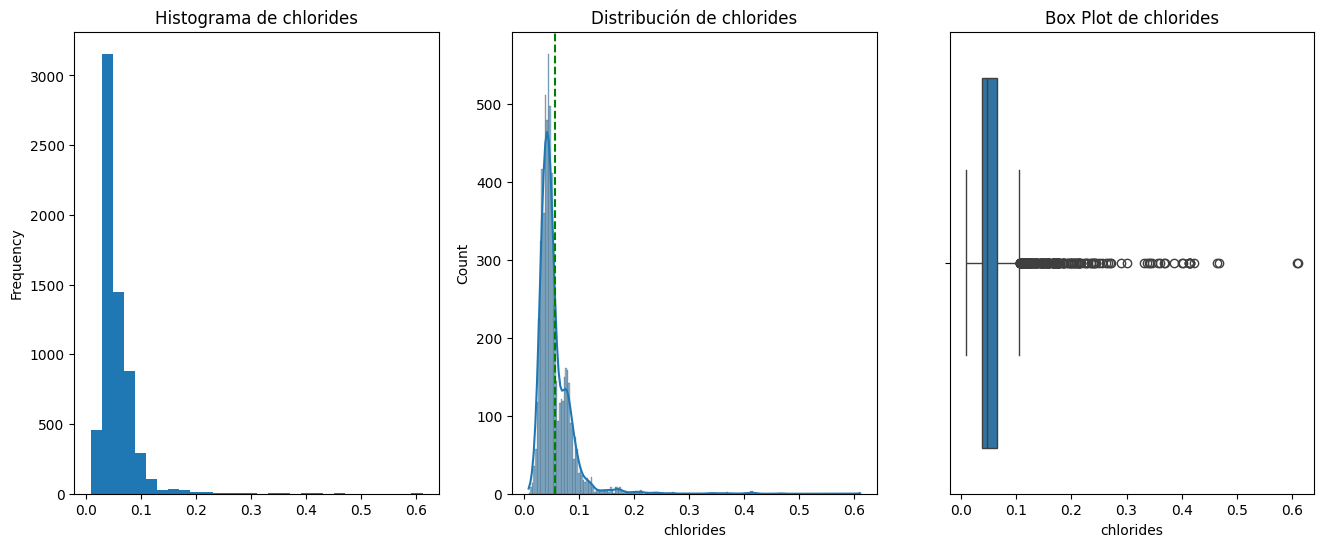

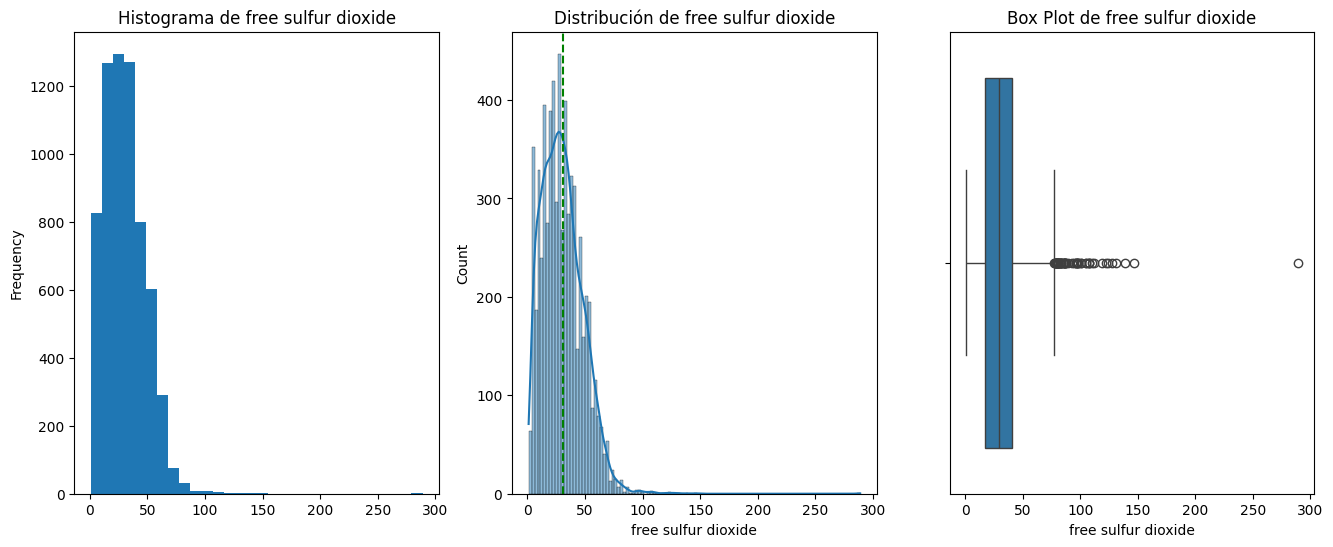

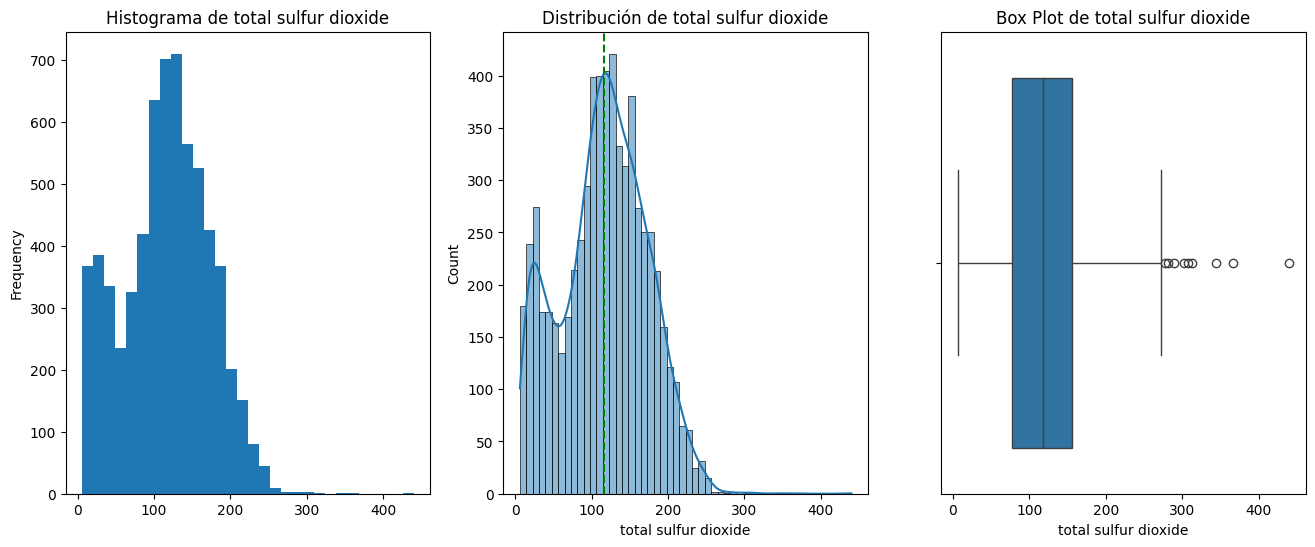

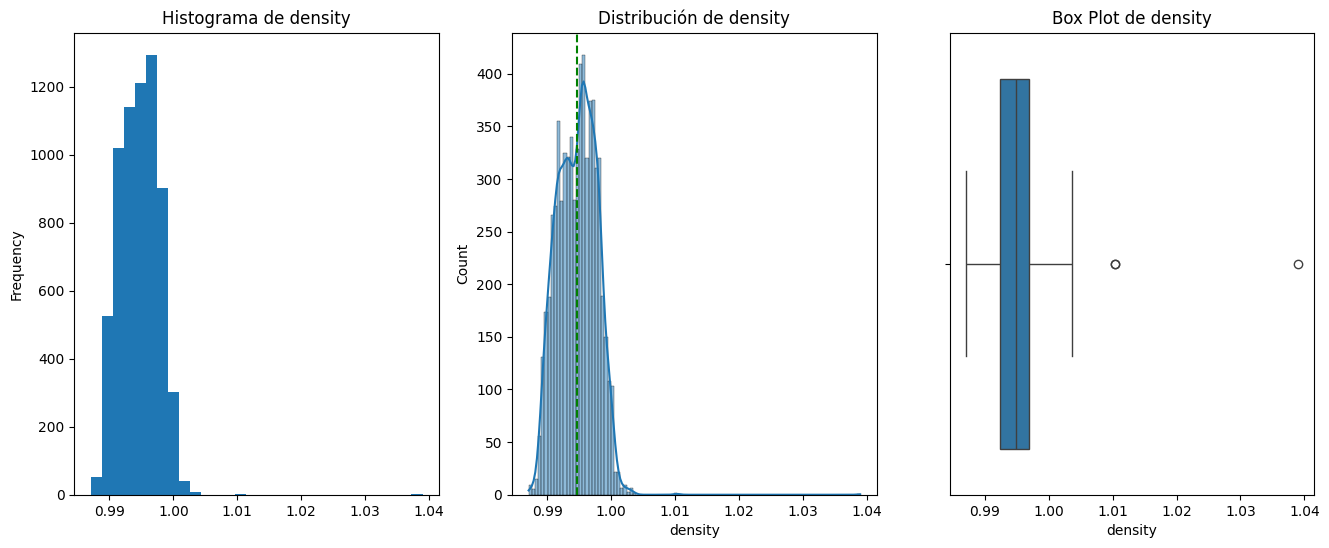

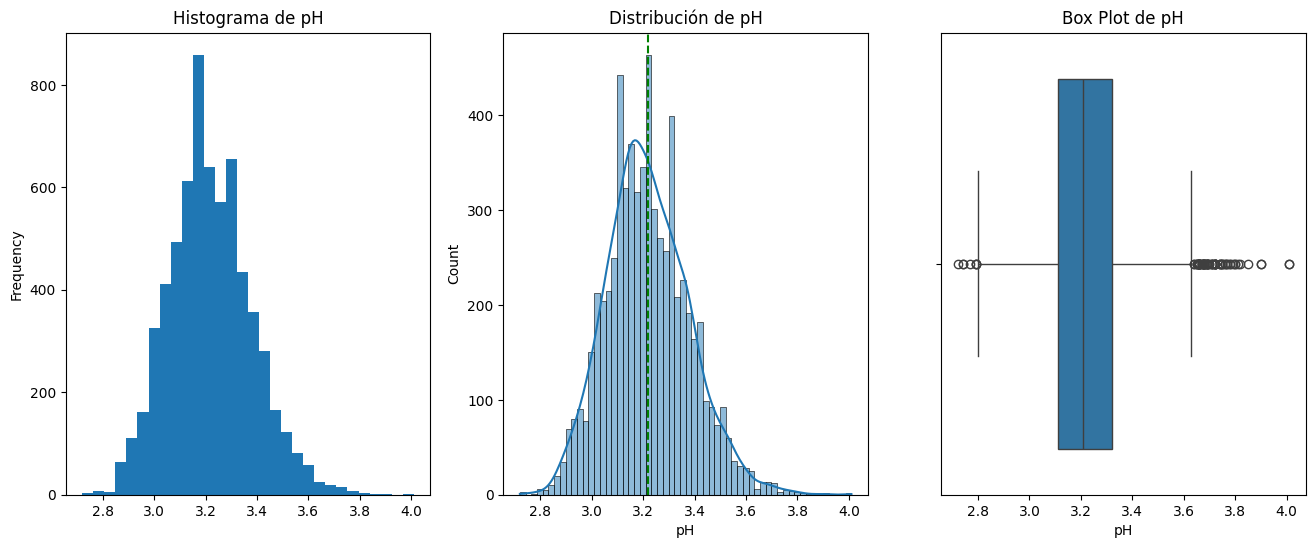

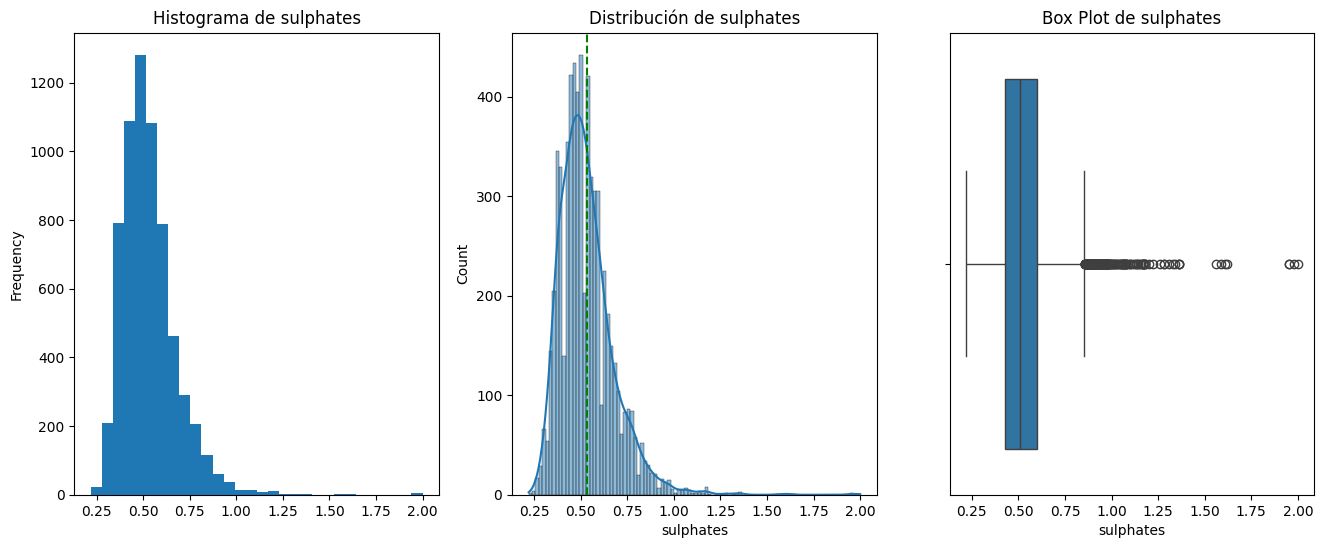

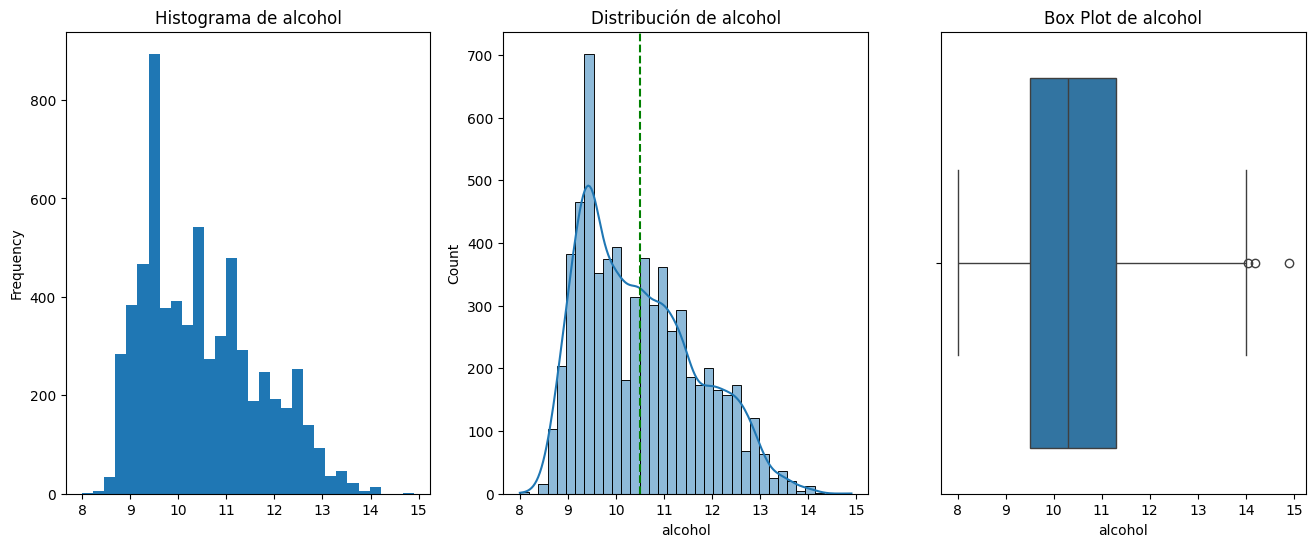

In [60]:
import scipy 
import seaborn as sns

def feat_plot(data, var):
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 3, 1)
    data[var].plot(kind='hist', bins=30)
    plt.title(f'Histograma de {var}')
    
    plt.subplot(1, 3, 2)
    mu, sigma = scipy.stats.norm.fit(data[var])
    sns.histplot(data[var], kde=True)
    plt.axvline(mu, linestyle='--', color='green')
    plt.title(f'Distribución de {var}')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(x=data[var])
    plt.title(f'Box Plot de {var}')
    plt.show()
    
    
numeric_vars = df.select_dtypes(include=['float64', 'int64']).columns.drop(['quality', 'wine type'])  # Excluir id, quality y wine type
for var in numeric_vars:
    feat_plot(df, var)

- Distribuciones Asimétricas: Algunas variables como residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide y alcohol muestran distribuciones altamente asimétricas.
- Distribuciones más simétricas y acotadas: Variables como fixed acidity, pH, density y sulphates parecen tener distribuciones más simétricas y están más concentradas en rangos específicos.
- Variables categóricas: quality y wine type 

In [61]:
categorical_vars = ['wine type', 'quality']
df_non_categorical = df.drop(categorical_vars, axis=1)


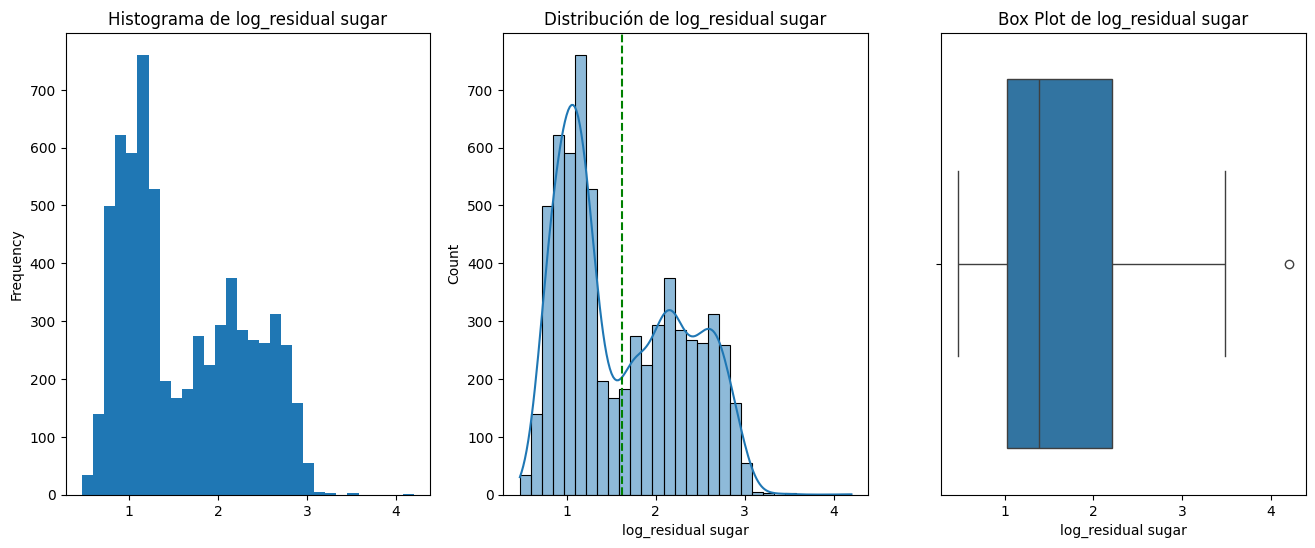

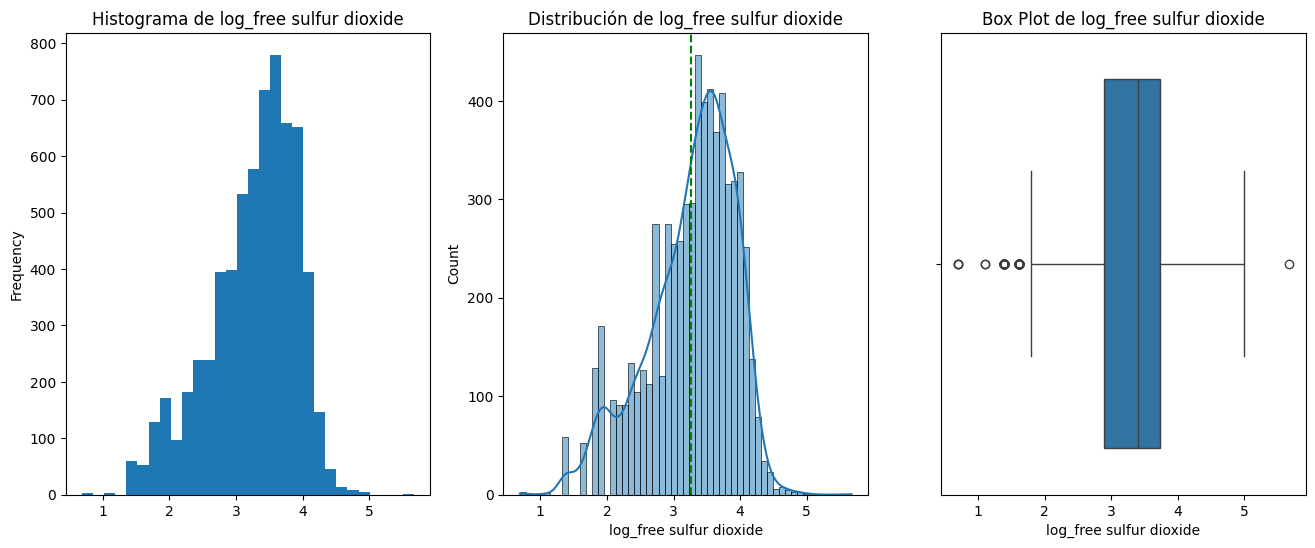

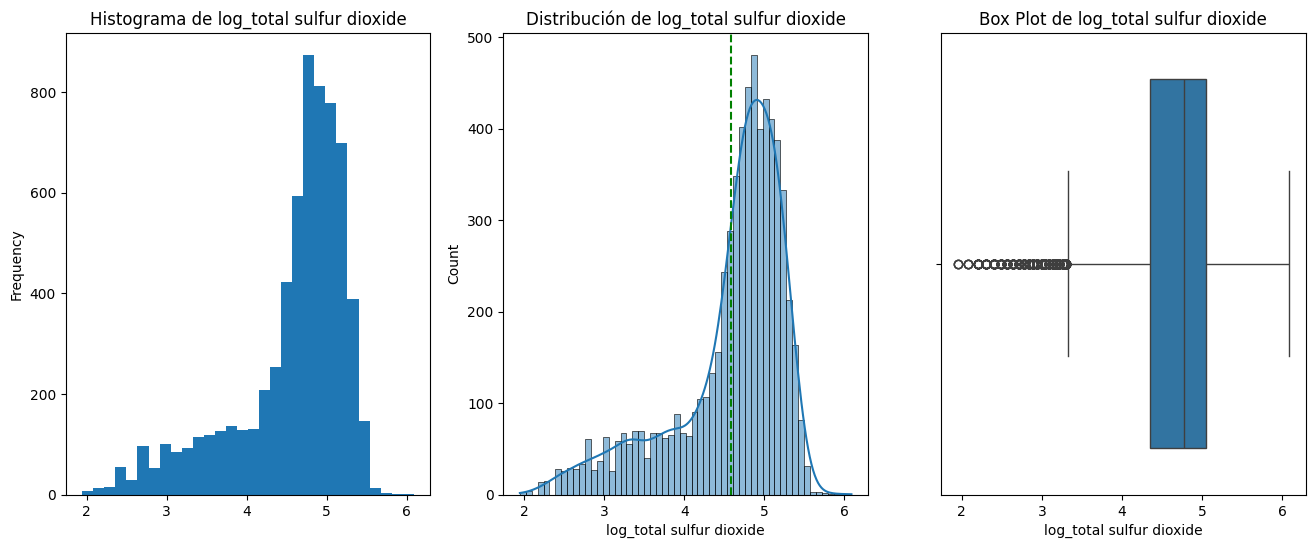

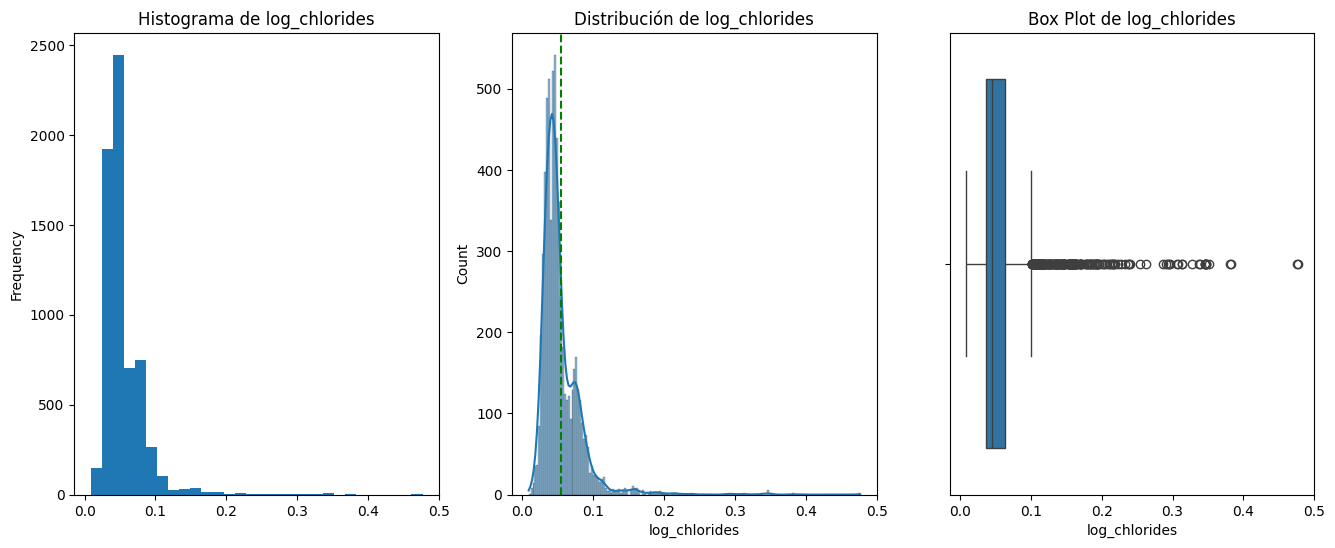

In [62]:
import numpy as np

transformed_vars = ['residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'chlorides']
for var in transformed_vars:
    df[f'log_{var}'] = np.log1p(df[var])

for var in transformed_vars:
    feat_plot(df, f'log_{var}')

Eliminamos las observaciones que resulten ser outliers tras la transformación logarítmica:

In [63]:
categorical_vars = ['wine type', 'quality']
numeric_columns = df.drop(categorical_vars, axis=1).columns

for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

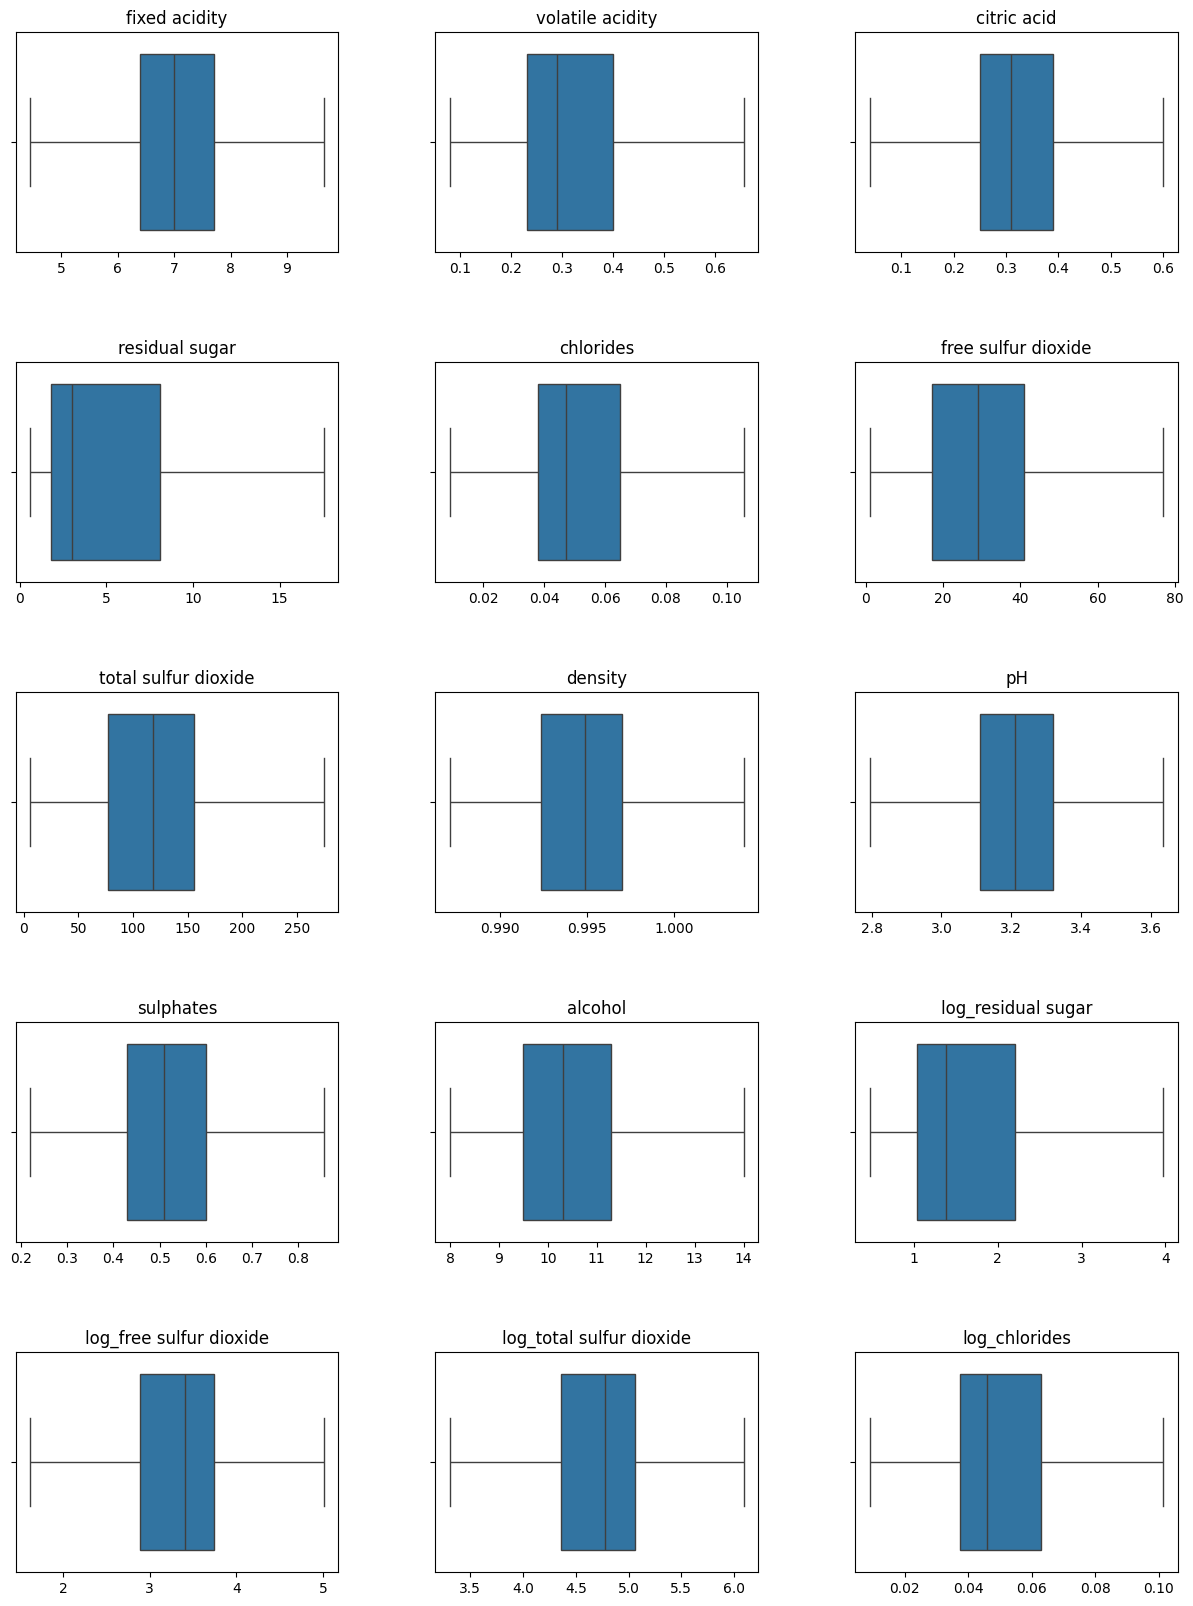

In [64]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
axes = axes.ravel()

categorical_vars = ['wine type', 'quality']
numeric_columns = df.drop(categorical_vars, axis=1).columns

for i, col in enumerate(numeric_columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')

for j in range(i+1, 15):
    fig.delaxes(axes[j])

plt.show()

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
scaler.fit_transform(df_train)
# df_test = scaler.transform(df_test)

# df_train = pd.DataFrame(df_train, columns=df.index)
# df_train.head()

array([[0.66346154, 0.22608696, 0.625     , ..., 0.43611193, 0.6259601 ,
        0.50224973],
       [0.74038462, 0.34782609, 0.78571429, ..., 0.09675346, 0.        ,
        0.86418864],
       [0.625     , 1.        , 0.        , ..., 0.54715184, 0.18342731,
        0.57358258],
       ...,
       [0.375     , 0.48695652, 0.28571429, ..., 0.74315642, 0.71014275,
        1.        ],
       [0.35576923, 0.4173913 , 0.39285714, ..., 0.75256511, 0.70566926,
        0.42014573],
       [0.52884615, 0.93913043, 0.03571429, ..., 0.34173858, 0.44124769,
        0.70482151]])

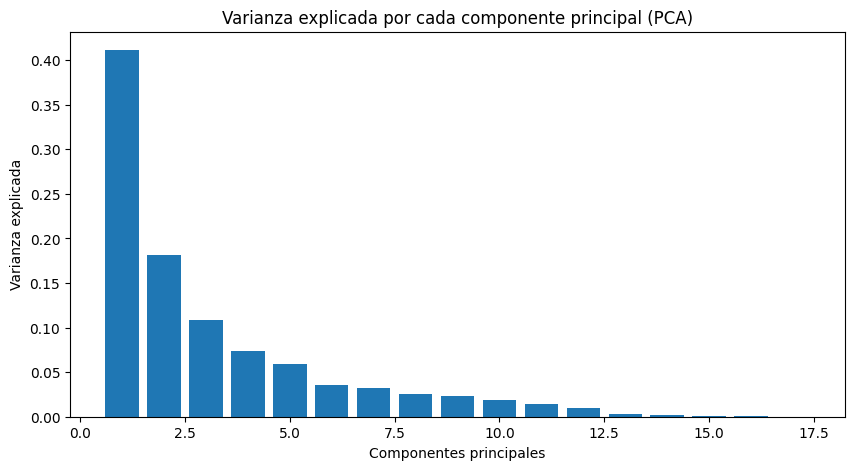

array([4.11384252e-01, 1.81779156e-01, 1.08936571e-01, 7.34892631e-02,
       5.87046853e-02, 3.52019122e-02, 3.24786133e-02, 2.55127156e-02,
       2.36774095e-02, 1.89270817e-02, 1.37396431e-02, 1.01665825e-02,
       2.58044580e-03, 1.59328812e-03, 1.00571785e-03, 8.20966271e-04,
       1.69732962e-06])

In [67]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA()
model = make_pipeline(scaler, pca)
model.fit(df_train)
explained_variance = model.named_steps['pca'].explained_variance_ratio_

# Visualizar la varianza explicada por cada componente principal
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.ylabel('Varianza explicada')
plt.xlabel('Componentes principales')
plt.title('Varianza explicada por cada componente principal (PCA)')
plt.show()

explained_variance

### TODO: Eliminar variables fijándonos en correlación

Para ver la relación entre las variables obtenemos la matriz de correlación (omitimos variables categóricas)

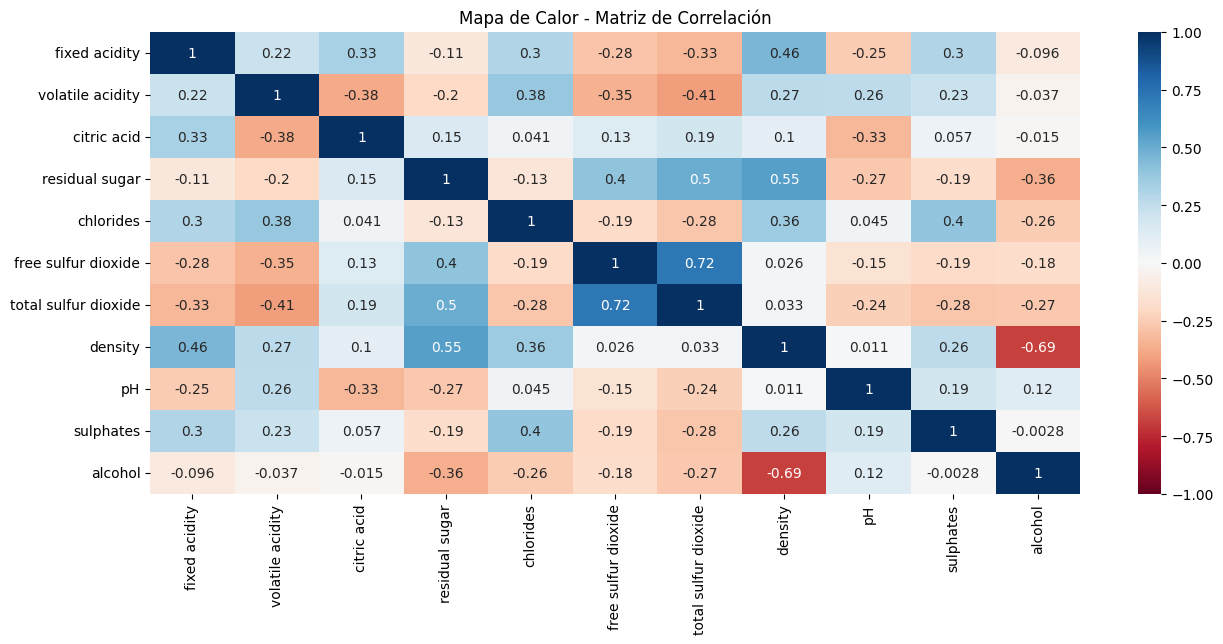

In [ ]:
import seaborn as sns

categorical_vars = ['wine type', 'quality']
df_non_categorical = df.drop(categorical_vars, axis=1)

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
sns.heatmap(df_non_categorical.corr(), cmap='RdBu', vmin=-1, vmax=1, annot=True)
plt.title('Mapa de Calor - Matriz de Correlación')
plt.show()

Pasamos ahora a estandarizar los datos, para ello nos servimos de la clase **MinMaxScaler** de **scikit-learn**, esta nos permite llevar los datos a un rango [0, 1] donde 0 representa el mínimo valor de la variable y 1 el máximo.

Aplicamos esta transformación sobre los datos que hemos estimado como no categóricos:

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_vars = df.select_dtypes(exclude='object').columns
df[numeric_vars] = scaler.fit_transform(df[numeric_vars])

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,wine type,alcohol
id,,,,,,,,,,,,,
0,0.142520,2.188453,-2.211415,-0.744829,0.569685,-1.099879,-1.446766,1.034708,1.812871,0.192989,-1.134561,-1.749832,-0.915248
1,0.451038,3.281772,-2.211415,-0.597708,1.197669,-0.311097,-0.862519,0.701168,-0.115209,0.999376,-1.134561,-1.749832,-0.579727
2,0.451038,2.552893,-1.933500,-0.660760,1.026400,-0.874513,-1.092677,0.767876,0.257968,0.797779,-1.134561,-1.749832,-0.579727
3,3.073437,-0.362626,1.679397,-0.744829,0.541141,-0.761830,-0.986450,1.101416,-0.363993,0.327387,0.233103,-1.749832,-0.579727
4,0.142520,2.188453,-2.211415,-0.744829,0.569685,-1.099879,-1.446766,1.034708,1.812871,0.192989,-1.134561,-1.749832,-0.915248


### Ejercicio 4 (Agrupamiento)

##### Objetivo (2 puntos)  

La  empresa  productora  de  vinos  desea  mejorar  el  proceso  de  producción  de  sus  vinos  con  el  objetivo  de 
mejorar las futuras producciones.  
Para ello han pensado en utilizar un algoritmo de agrupamiento jerárquico para segmentar los diferentes vinos 
en base a sus componentes, calidad y nivel de alcohol.

Dado el mejor valor de k del apartado anterior selecciona los 10 ejemplos más representativos de cada 
clúster para generar un nuevo dataset y aplicar agrupamiento jerárquico y responder a las siguientes 
preguntas:  

• ¿Cuál ha sido tu criterio para seleccionar los ejemplos más representativos de cada clúster? (0,5 
puntos). 

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster
from gower.gower_dist import gower_matrix
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform

gower_mat = gower_matrix(df)
linkage_matrix = linkage(squareform(gower_mat), method='average')  # Puedes elegir otro método de linkage

# Determina el número de clusters
k = 2  # Puedes elegir otro número de clusters
clusters = fcluster(linkage_matrix, t=k, criterion='maxclust')

df['Cluster'] = clusters

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,wine type,alcohol,Cluster
id,,,,,,,,,,,,,,
0,0.142520,2.188453,-2.211415,-0.744829,0.569685,-1.099879,-1.446766,1.034708,1.812871,0.192989,-1.134561,-1.749832,-0.915248,1
1,0.451038,3.281772,-2.211415,-0.597708,1.197669,-0.311097,-0.862519,0.701168,-0.115209,0.999376,-1.134561,-1.749832,-0.579727,1
2,0.451038,2.552893,-1.933500,-0.660760,1.026400,-0.874513,-1.092677,0.767876,0.257968,0.797779,-1.134561,-1.749832,-0.579727,1
3,3.073437,-0.362626,1.679397,-0.744829,0.541141,-0.761830,-0.986450,1.101416,-0.363993,0.327387,0.233103,-1.749832,-0.579727,1
4,0.142520,2.188453,-2.211415,-0.744829,0.569685,-1.099879,-1.446766,1.034708,1.812871,0.192989,-1.134561,-1.749832,-0.915248,1


3) Generar y analizar el dendrograma resultante del proceso de agrupamiento. (0,75 puntos)

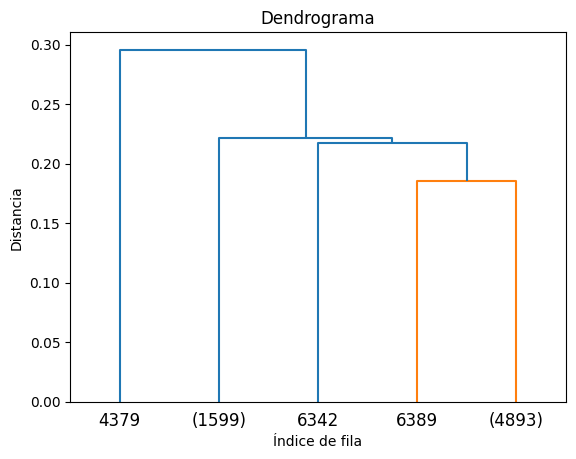

In [ ]:
from scipy.cluster.hierarchy import dendrogram

dendrogram(linkage_matrix, p=5, truncate_mode='lastp', show_leaf_counts=True)
plt.title("Dendrograma")
plt.xlabel("Índice de fila")
plt.ylabel("Distancia")
plt.show()